In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set_style("darkgrid")

# Load dataset

In [ ]:
sales = pd.read_csv("/Sales Data.csv")

# Examining Dataset

In [ ]:
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
sales.shape

(185950, 11)

In [ ]:
sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [ ]:
sales[['Product','City']].nunique()
# the below columns can be converted to "category" data type

,0
Product,19
City,9


In [ ]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

# Data Cleaning and Preprocessing

# Droping irrelevant columns

In [ ]:
sales.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


# Rename columns

In [ ]:
sales.columns = ["order_id",
                 "product",
                 "quantity",
                 "price_each",
                 "order_date",
                 "purchase_address",
                 "month",
                 "sales_amount",
                 "city",
                 "hour"]

sales.columns

Index(['order_id', 'product', 'quantity', 'price_each', 'order_date',
       'purchase_address', 'month', 'sales_amount', 'city', 'hour'],
      dtype='object')

In [ ]:
#Checking datatypes for any inconsistency
sales.dtypes

,0
order_id,int64
product,object
quantity,int64
price_each,float64
order_date,object
purchase_address,object
month,int64
sales_amount,float64
city,object
hour,int64


# Examine columns with "object" datatypes for leading and trailing whitespaces

In [ ]:
print(sales[["product", "purchase_address", "city"]].apply(lambda x: x.str.startswith(" ")).sum())

print(sales[["product", "purchase_address", "city"]].apply(lambda x: x.str.endswith(" ")).sum())

product                  0
purchase_address         0
city                185950
dtype: int64
product             0
purchase_address    0
city                0
dtype: int64


In [ ]:
#All entries in "city" column has data containing leading spaces.

# Strip "city" column from leading spaces

sales["city"] = sales["city"].str.strip()


In [ ]:
#Confirm leading spaces have been removed:
print(sales[["city"]].apply(lambda x: x.str.startswith(" ")).sum())

city    0
dtype: int64


# Convert to appropriate data types

In [ ]:
sales = sales.astype({"order_id":"int32",
                      "product":"category",
                      "quantity":"int8",
                      "order_date":"datetime64[ns]",
                      "purchase_address":"category",
                      "month":"int8",
                      "city":"category",
                      "hour":"int8"})

sales.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int32         
 1   product           185950 non-null  category      
 2   quantity          185950 non-null  int8          
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  category      
 6   month             185950 non-null  int8          
 7   sales_amount      185950 non-null  float64       
 8   city              185950 non-null  category      
 9   hour              185950 non-null  int8          
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int8(3)
memory usage: 22.8 MB


# Check for missing values

In [ ]:
sales.isna().sum()

,0
order_id,0
product,0
quantity,0
price_each,0
order_date,0
purchase_address,0
month,0
sales_amount,0
city,0
hour,0


# Determine and handle duplicate rows

In [ ]:
sales[sales.duplicated()]

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour
438,296081,Flatscreen TV,1,300.00,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1727,297311,Bose SoundSport Headphones,1,99.99,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
2812,298358,Apple Airpods Headphones,1,150.00,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.00,San Francisco,15
3119,298657,Lightning Charging Cable,1,14.95,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.95,Atlanta,18
3363,298883,Wired Headphones,1,11.99,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001",12,11.99,Los Angeles,18
...,...,...,...,...,...,...,...,...,...,...
181613,218756,AAA Batteries (4-pack),1,2.99,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.99,Boston,14
181883,219007,AA Batteries (4-pack),1,3.84,2019-06-24 11:16:00,"42 8th St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
183323,220392,Lightning Charging Cable,1,14.95,2019-06-08 17:13:00,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
183826,220882,Lightning Charging Cable,1,14.95,2019-06-13 17:53:00,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17


In [ ]:
#Determine the number of duplicate rows

sales.duplicated().sum()

264

In [ ]:
#Drop duplicate rows

sales = sales.drop_duplicates().reset_index(drop=True)

In [ ]:
#check again for the duplicate rows if any
sales.duplicated().sum()

0

In [ ]:
#confirming the new row count
sales.shape

(185686, 10)

# Create new columns:
date

day_of_week

In [ ]:
sales = (sales.assign(
    date=sales["order_date"].dt.date,
    day_of_week=sales["order_date"].dt.dayofweek)
        )

sales.head()

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour,date,day_of_week
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,2


# Set "date" as index. Drop the "order_date" column

In [ ]:
sales = (sales
         .set_index("date")
         .sort_index()
         .drop("order_date", axis=1)
        )

sales.head()

,order_id,product,quantity,price_each,purchase_address,month,sales_amount,city,hour,day_of_week
date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,"164 West St, Boston, MA 02215",1,99.99,Boston,9,1
2019-01-01,147414,Lightning Charging Cable,1,14.95,"12 Hickory St, San Francisco, CA 94016",1,14.95,San Francisco,23,1
2019-01-01,141364,AA Batteries (4-pack),1,3.84,"657 Lincoln St, Dallas, TX 75001",1,3.84,Dallas,7,1
2019-01-01,145122,ThinkPad Laptop,1,999.99,"501 Adams St, Los Angeles, CA 90001",1,999.99,Los Angeles,16,1
2019-01-01,147386,USB-C Charging Cable,1,11.95,"793 11th St, San Francisco, CA 94016",1,11.95,San Francisco,11,1


In [ ]:
#Re-order columns
desired_order = ["order_id",
                 "product",
                 "quantity",
                 "price_each",
                 "sales_amount",
                 "purchase_address",
                 "city",
                 "month",
                 "day_of_week",
                 "hour"]

sales = sales[desired_order]

sales.head()

,order_id,product,quantity,price_each,sales_amount,purchase_address,city,month,day_of_week,hour
date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,99.99,"164 West St, Boston, MA 02215",Boston,1,1,9
2019-01-01,147414,Lightning Charging Cable,1,14.95,14.95,"12 Hickory St, San Francisco, CA 94016",San Francisco,1,1,23
2019-01-01,141364,AA Batteries (4-pack),1,3.84,3.84,"657 Lincoln St, Dallas, TX 75001",Dallas,1,1,7
2019-01-01,145122,ThinkPad Laptop,1,999.99,999.99,"501 Adams St, Los Angeles, CA 90001",Los Angeles,1,1,16
2019-01-01,147386,USB-C Charging Cable,1,11.95,11.95,"793 11th St, San Francisco, CA 94016",San Francisco,1,1,11


# Data Analysis and Visualization

## Calculate unique values:

### order_id

### product

### purchase_address

### city

In [ ]:
# Calculate the number of unique values

print(f'order_id: {sales["order_id"].nunique()}\n'
      f'product: {sales["product"].nunique()}\n'
      f'purchase_address: {sales["purchase_address"].nunique()}\n'
      f'city: {sales["city"].nunique()}')

order_id: 178437
product: 19
purchase_address: 140787
city: 9


# Calculate:

## Total Sales Amount

## Average Price Per Order

## Quantity Sold

In [ ]:

# Total Sales Amount

sales["sales_amount"].sum()

34465537.94

In [ ]:
# Average sales per order

(sales["sales_amount"].sum() / sales["order_id"].nunique()).round()

# This provides insights into the average transaction value.

193.0

In [ ]:
# Quantity Sold

sales["quantity"].sum()

208812

# Visualizations

Total Sales Amount by Product

Quantity sold by Product

Revenue by City

Monthly Sales Trend

Sales by Day

Hourly Sales Distribution

<ipython-input-38-57a2bcc178a5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("product")


<Axes: title={'center': 'Total Sales Amount by Product'}, xlabel='Product', ylabel='Million USD'>

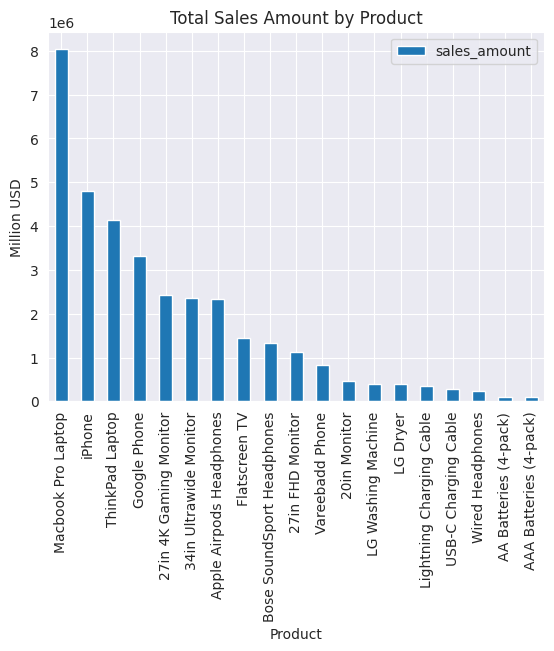

In [ ]:
# Top-selling products based on total sales

(sales
.groupby("product")
.agg({"sales_amount":"sum"})
.sort_values(by="sales_amount", ascending=False)
.plot.bar(
    title="Total Sales Amount by Product",
    ylabel="Million USD",
    xlabel="Product")
)

<ipython-input-39-9571a8a1b70a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("product")


<Axes: title={'center': 'Quantity Sold by Product'}, xlabel='Product'>

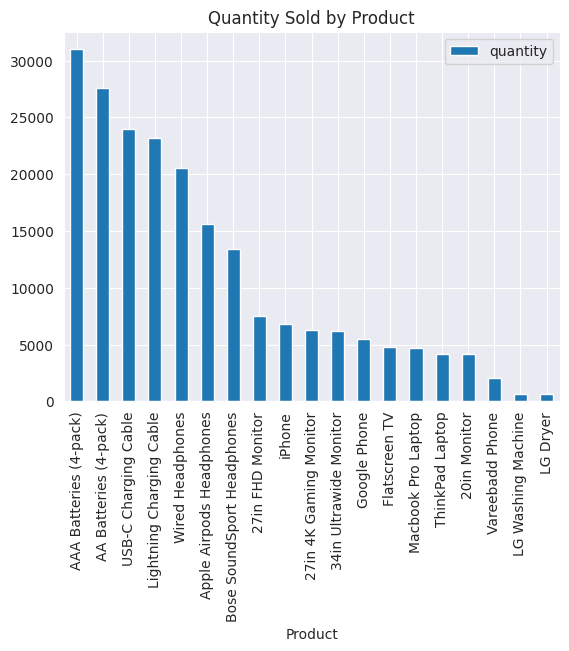

In [ ]:
# Top-selling products based on quantity sold

(sales
 .groupby("product")
 .agg({"quantity":"sum"})
 .sort_values(by="quantity", ascending=False)
 .plot.bar(
     title="Quantity Sold by Product",
     xlabel="Product")
)

<ipython-input-40-a8b6cfce0316>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("city")


<Axes: title={'center': 'Revenue by City'}, xlabel='City', ylabel='Million USD'>

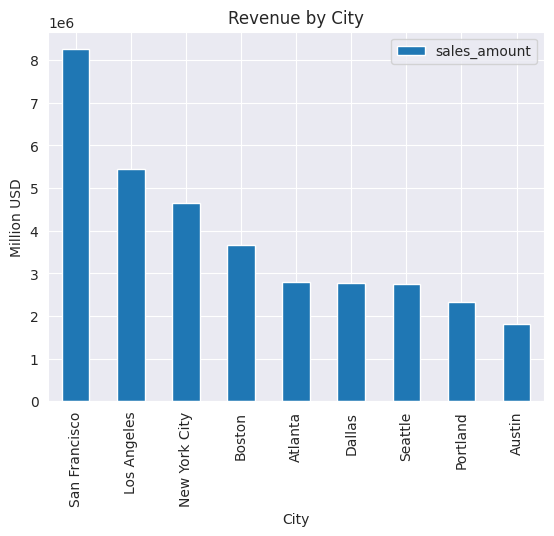

In [ ]:
# Revenue by city

(sales
 .groupby("city")
 .agg({"sales_amount":"sum"})
 .sort_values(by="sales_amount", ascending=False)
 .plot.bar(
     title="Revenue by City",
     ylabel="Million USD",
     xlabel="City")
)

(0.0, 4747639.8270000005)

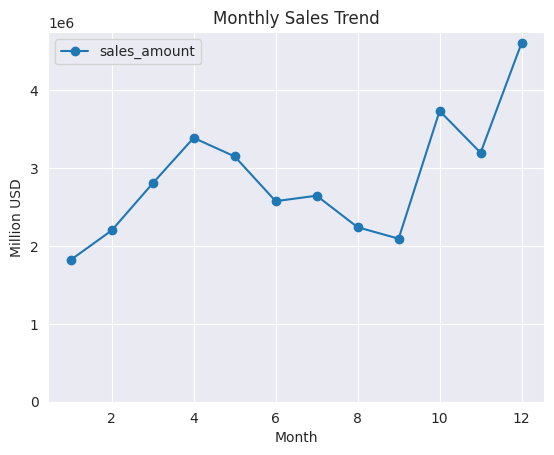

In [ ]:
# Monthly Sales Trend

monthly_sales = (sales
                 .groupby("month")
                 .agg({"sales_amount":"sum"})
                 .plot(
                     title="Monthly Sales Trend",
                     ylabel="Million USD",
                     xlabel="Month",
                     marker="o")
                )

monthly_sales.set_ylim(0)

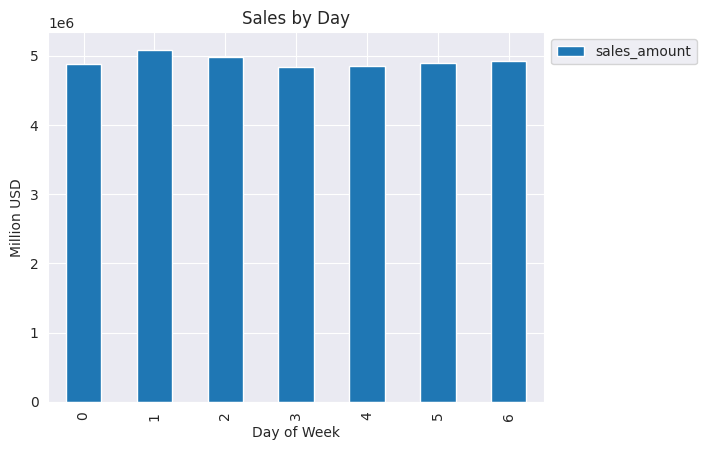

In [ ]:
# Sales by Day

day_sales = (sales
             .groupby("day_of_week")
             .agg({"sales_amount":"sum"})
             .plot.bar(
                 title="Sales by Day",
                 ylabel="Million USD",
                 xlabel="Day of Week")
             .legend(bbox_to_anchor=(1,1))
            )


day_sales

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

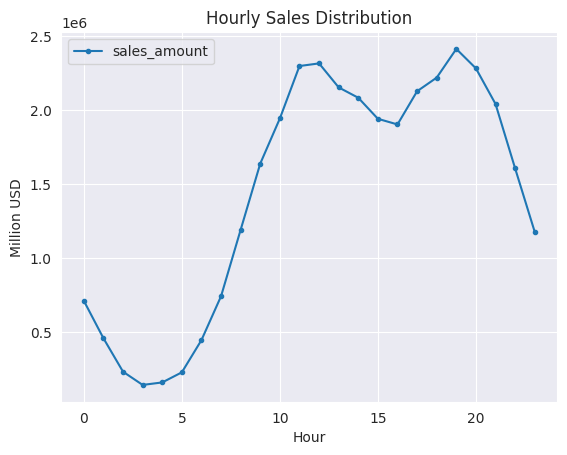

In [ ]:
# Hourly Sales Distribution

(sales
 .groupby("hour")
 .agg({"sales_amount":"sum"})
 .plot(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour",
     marker=".")
)

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

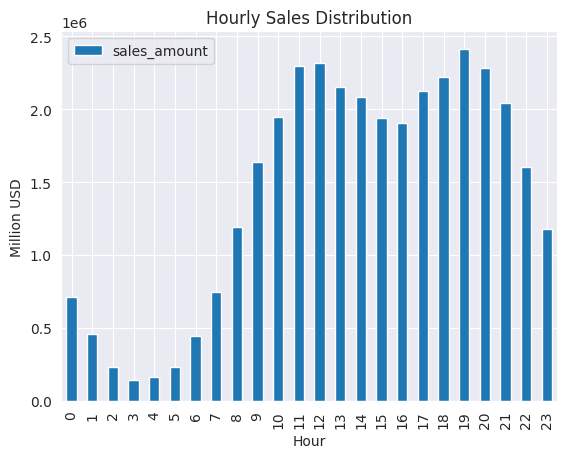

In [ ]:
# Hourly Sales Distribution in bar graph.

(sales
 .groupby("hour")
 .agg({"sales_amount":"sum"})
 .plot.bar(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour")
)

# Insights
1.)The Macbook Pro Laptop stands out as the highest-performing product, contributing the most to total sales.

2.)Both AAA Batteries (4-pack) and AA Batteries (4-pack), emerge as top-selling products by quantity, followed by charging cables.

3.)The products ranking highest in terms of "quantity" are positioned at the bottom in total sales, attributed to their lower pricing compared to other items in the product range.

4.)San Francisco leads in sales, contributing the highest revenue, followed by Los Angeles and New York City. The data underscores the significant market presence in major metropolitan areas.

5.)The data shows a seasonal pattern, with peak sales in October, November, and December, reflecting increased consumer spending during the holiday season. Following the holiday season, a decline in sales is observed, indicating diminished consumer activity post-holidays.

6.)The overall trend shows a slight increase from Monday to Tuesday, followed by relatively consistent sales throughout the rest of the week.

7.)Sales peak during late morning to early afternoon, notably between 10 AM and 2 PM, and again from 5 PM to 8 PM. This insight is crucial for refining staffing and marketing strategies, enabling the business to enhance customer service by ensuring adequate staffing during peak hours.